## SPAM COLLECTION

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
#nltk.download('stopwords')

from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,precision_score ,ConfusionMatrixDisplay,f1_score, RocCurveDisplay,PrecisionRecallDisplay

In [2]:
df = pd.read_csv('SMSSpamCollection', sep='\t', names= ['label', 'message'])

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


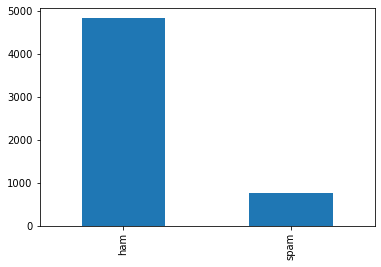

In [31]:
df['label'].value_counts().plot(kind='bar');

In [3]:
df['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [4]:
re.sub('[^a-zA-Z]', ' ', df['message'][0]).lower().split()

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat']

In [5]:
ps = PorterStemmer()
corpus = []

for num in range(len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['message'][num])
    review= review.lower()
    review= review.split()
    
    review = [ps.stem(word) for word in review  if word not in stopwords.words ('english')]
    review = ' '.join(review)
    corpus.append(review)    

In [6]:
corpus[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [7]:
len(corpus)

5572

### Making a Bag of Words Model

In [8]:
cv =CountVectorizer()

X = cv.fit_transform(corpus).toarray()

In [9]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [10]:
X.shape

(5572, 6296)

In [11]:
y= pd.get_dummies(df['label'])

y = y.iloc[:,1].values

### Test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=6)

In [13]:
spam_detect_model = MultinomialNB().fit(X_train,y_train)

In [14]:
y_pred = spam_detect_model.predict(X_test)

In [15]:
result = confusion_matrix(y_pred,y_test)
result

array([[952,   4],
       [ 28, 131]])

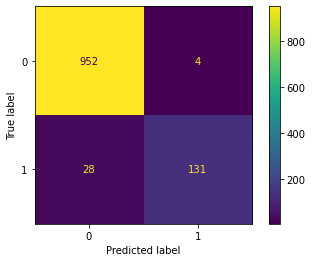

In [16]:
disp = ConfusionMatrixDisplay(confusion_matrix=result, display_labels=spam_detect_model.classes_)
disp.plot()
plt.show()

In [17]:
accuracy = accuracy_score (y_pred,y_test)
accuracy

0.9713004484304932

In [24]:
recall_score(y_pred,y_test)

0.8238993710691824

In [25]:
precision_score(y_pred,y_test)

0.9703703703703703

In [18]:
f1_score(y_pred,y_test)

0.891156462585034

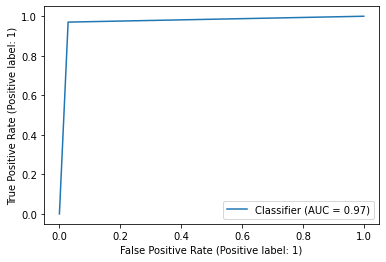

In [19]:
RocCurveDisplay.from_predictions(y_test, y_pred)

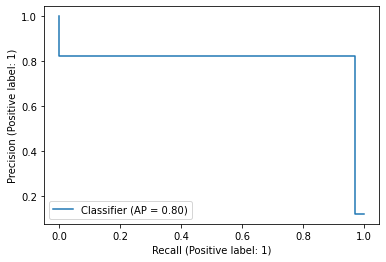

In [21]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred)